## Retrieve & Prepare the Data

In [1]:
#import libraries
import numpy as np
import pandas as pd

In [2]:
# Import the data
myopia_df = pd.read_csv("myopia.csv")

#test to ensure df loaded
myopia_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [3]:
# Drop the "MYOPIC" column from the dataset (target column)
new_myopia_df = myopia_df.drop("MYOPIC", axis=1)

#test to ensure df loaded
new_myopia_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [4]:
#Standardize the dataset so that columns that contain larger values do not 
    #influence the outcome more than columns with smaller values.

#import library
from sklearn.preprocessing import StandardScaler

#define "column names" namespace to reference
column_names = new_myopia_df.columns

#scale data
scaler = StandardScaler().fit_transform(new_myopia_df)

In [5]:
#write scaled data to new df
myopia_df_scaled = pd.DataFrame(scaler, columns=column_names)

In [6]:
#test to ensure df loaded and see shape
myopia_df_scaled.shape

(618, 14)

## Apply Dimensionality Reduction

In [7]:
#Perform dimensionality reduction with PCA

from sklearn.decomposition import PCA

# Create an instance of the PCA class
pca = PCA(n_components=0.9)

# Fit and transform the data to the principal components
pca_data = pca.fit_transform(myopia_df_scaled)

#review shape of pca_data
pca_data.shape

(618, 10)

#### EXPLAIN: how did the number of the features change?

The number of features/columns dropped from 14 to 10 during dimentionality reduction.

In [8]:
#Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
    #To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

from sklearn.manifold import TSNE

# Create an instance of the TSNE class
tsne = TSNE()

# Fit and transform the data
tsne_data = tsne.fit_transform(pca_data)

#inspect the tsne reduced dataset
tsne_data

/Users/jhernieevangelista/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jhernieevangelista/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ -4.524232 , -10.345569 ],
       [-20.851921 ,  -3.2145133],
       [ 17.530645 ,  -3.373804 ],
       ...,
       [-24.223196 ,   3.6218169],
       [ 17.810484 , -13.424767 ],
       [-19.51758  , -14.731592 ]], dtype=float32)

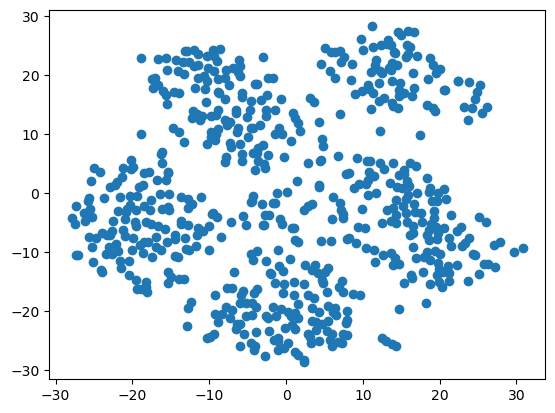

In [9]:
# Create a scatter plot of the t-SNE output
import matplotlib.pyplot as plt

plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()

#### EXPLAIN: Are there distinct clusters?

Yes, it appears that there are 5 distinct clusters according to this visualization.

## Perform a Cluster Analysis with K-means